In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pqc import *

In [9]:
ckt = EfficientSU2(5, su2_gates=['ry'], reps=3, entanglement='linear', insert_barriers=False, skip_final_rotation_layer=True)

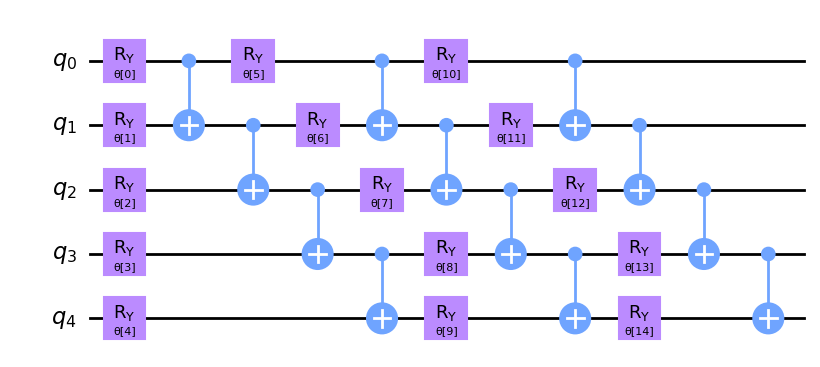

In [10]:
ckt.decompose().draw('mpl', filename='ansatz.png')

In [34]:
depths = []
sizes = []
num_params = []
nlgates = []

rep_comp = {'N'    : (0, '$reps = \lceil N/2 \\rceil$'), 
            'N23'  : (1, '$reps = \lceil N^{2/3} \\rceil$'), 
            'N12'  : (2, '$reps = \lceil N^{1/2} \\rceil$'), 
            'LogN' : (3, '$reps = \lceil\log_2N\\rceil$')}

for rep in rep_comp:
    depth = []
    size = []
    num_param = []
    nlgate = []

    for N in range(2, 33):   
        d = int(np.ceil(np.log2(N)))
        if rep == 'N':
            reps = int(np.ceil(N/2))
        elif rep == 'N23':
            reps = int(np.ceil((np.power(N, 2.0/3))))
        elif rep == 'N12':
            reps = int(np.ceil(np.sqrt(N)))
        elif rep == 'LogN':
            reps = int(np.ceil(np.log2(N)))

        ckt = prep_circ(reps, d, [0 for _ in range(d*reps)], ['ry'], False).decompose()
        
        depth.append(ckt.depth())
        size.append(ckt.num_qubits)
        num_param.append(d*reps)
        nlgate.append(ckt.num_nonlocal_gates())

    depths.append(depth)
    sizes.append(size)
    num_params.append(num_param)
    nlgates.append(nlgate)


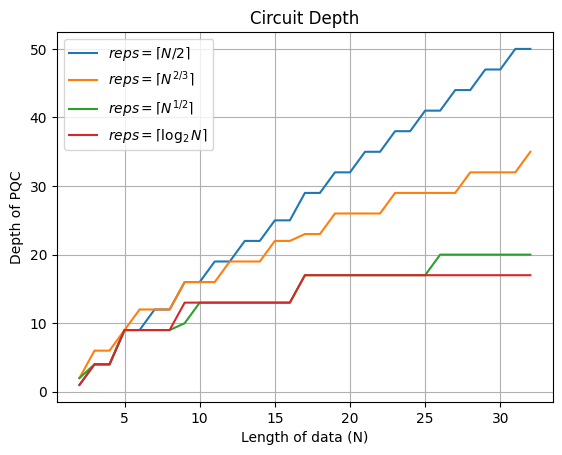

In [37]:
for rep in rep_comp:
    plt.plot(range(2, 33), depths[rep_comp[rep][0]], label=rep_comp[rep][1])

plt.grid(True)

plt.xlabel('Length of data (N)')
plt.ylabel('Depth of PQC')
plt.title('Circuit Depth')

plt.legend()
plt.savefig('depth.png')

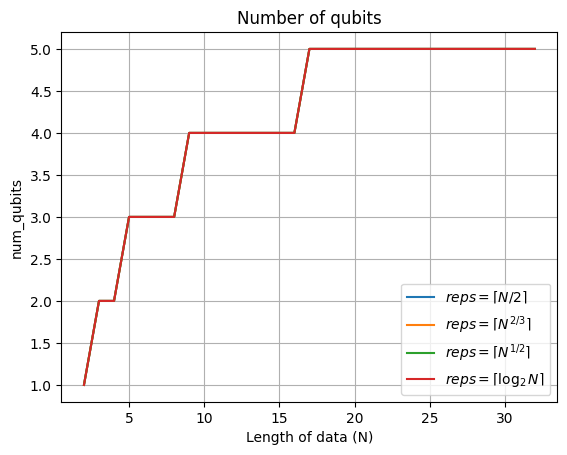

In [20]:
for rep in rep_comp:
    plt.plot(range(2, 33), sizes[rep_comp[rep][0]], label=rep_comp[rep][1])

plt.grid(True)

plt.xlabel('Length of data (N)')
plt.ylabel('num_qubits')
plt.title('Number of qubits')

plt.legend()
plt.savefig('num_qubits.png')

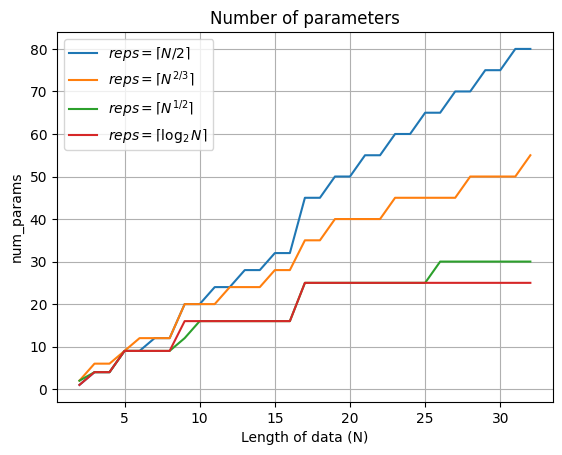

In [21]:
for rep in rep_comp:
    plt.plot(range(2, 33), num_params[rep_comp[rep][0]], label=rep_comp[rep][1])

plt.grid(True)

plt.xlabel('Length of data (N)')
plt.ylabel('num_params')
plt.title('Number of parameters')

plt.legend()
plt.savefig('num_params.png')

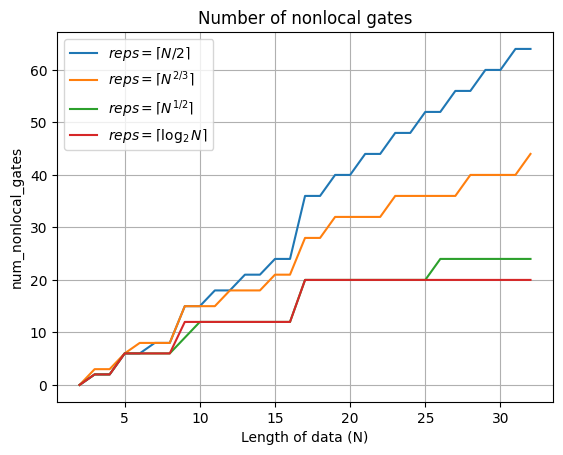

In [38]:
for rep in rep_comp:
    plt.plot(range(2, 33), nlgates[rep_comp[rep][0]], label=rep_comp[rep][1])

plt.grid(True)

plt.xlabel('Length of data (N)')
plt.ylabel('num_nonlocal_gates')
plt.title('Number of nonlocal gates')

plt.legend()
plt.savefig('num_nonlocal_gates.png')

## Positive Array

In [7]:
cst1 = open('expt1_positive/cost.txt', 'r')
cst2 = open('expt2_positive/cost.txt', 'r')
cst3 = open('expt3_positive/cost.txt', 'r')
cst4 = open('expt4_positive/cost.txt', 'r')
cst5 = open('expt5_positive/cost.txt', 'r')
cst6 = open('expt6_positive/cost.txt', 'r')
cst7 = open('expt7_positive/cost.txt', 'r')
cst8 = open('expt8_positive/cost.txt', 'r')

cost1 = list(map(float, cst1.read()[1:-1].split(', ')))
cost2 = list(map(float, cst2.read()[1:-1].split(', ')))
cost3 = list(map(float, cst3.read()[1:-1].split(', ')))
cost4 = list(map(float, cst4.read()[1:-1].split(', ')))
cost5 = list(map(float, cst5.read()[1:-1].split(', ')))
cost6 = list(map(float, cst6.read()[1:-1].split(', ')))
cost7 = list(map(float, cst7.read()[1:-1].split(', ')))
cost8 = list(map(float, cst8.read()[1:-1].split(', ')))

cst1.close()
cst2.close()
cst3.close()
cst4.close()
cst5.close()
cst6.close()
cst7.close()
cst8.close()

In [8]:
tme1 = open('expt1_positive/time.txt', 'r')
tme2 = open('expt2_positive/time.txt', 'r')
tme3 = open('expt3_positive/time.txt', 'r')
tme4 = open('expt4_positive/time.txt', 'r')
tme5 = open('expt5_positive/time.txt', 'r')
tme6 = open('expt6_positive/time.txt', 'r')
tme7 = open('expt7_positive/time.txt', 'r')
tme8 = open('expt8_positive/time.txt', 'r')

time1 = list(map(float, tme1.read()[1:-1].split(', ')))
time2 = list(map(float, tme2.read()[1:-1].split(', ')))
time3 = list(map(float, tme3.read()[1:-1].split(', ')))
time4 = list(map(float, tme4.read()[1:-1].split(', ')))
time5 = list(map(float, tme5.read()[1:-1].split(', ')))
time6 = list(map(float, tme6.read()[1:-1].split(', ')))
time7 = list(map(float, tme7.read()[1:-1].split(', ')))
time8 = list(map(float, tme8.read()[1:-1].split(', ')))

tme1.close()
tme2.close()
tme3.close()
tme4.close()
tme5.close()
tme6.close()
tme7.close()
tme8.close()

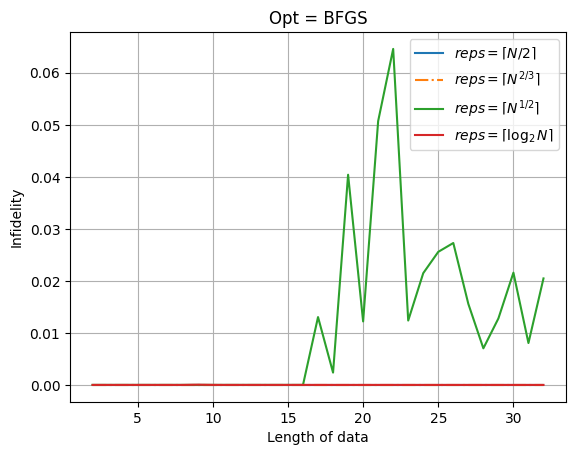

In [23]:
plt.plot(range(2, 33), cost1, label=rep_comp['N'][1])
plt.plot(range(2, 33), cost7, label=rep_comp['N23'][1], linestyle='-.')
plt.plot(range(2, 33), cost2, label=rep_comp['N12'][1])
plt.plot(range(2, 33), cost3, label=rep_comp['LogN'][1])

plt.grid(True)

plt.xlabel('Length of data')
plt.ylabel('Infidelity')
plt.title('Opt = BFGS')

plt.legend()
plt.savefig('infidelity_BFGS.png')

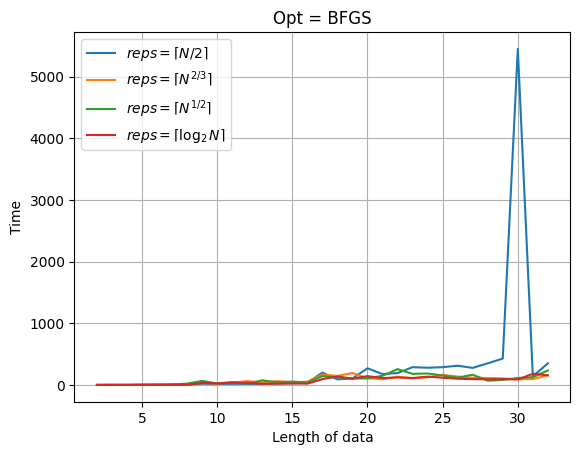

In [24]:
plt.plot(range(2, 33), time1, label=rep_comp['N'][1])
plt.plot(range(2, 33), time7, label=rep_comp['N23'][1])
plt.plot(range(2, 33), time2, label=rep_comp['N12'][1])
plt.plot(range(2, 33), time3, label=rep_comp['LogN'][1])

plt.grid(True)

plt.xlabel('Length of data')
plt.ylabel('Time')
plt.title('Opt = BFGS')

plt.legend()
plt.savefig('time_BFGS.png')

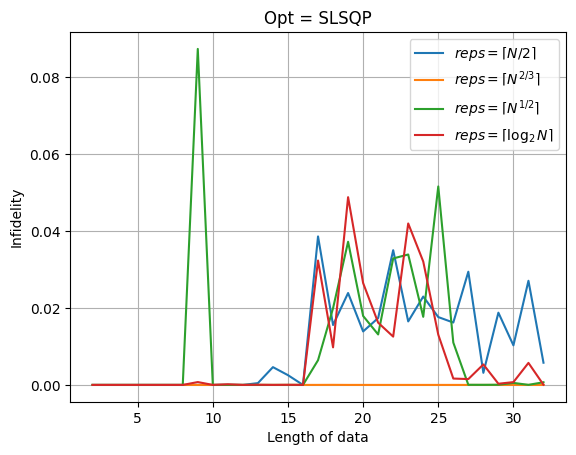

In [25]:
plt.plot(range(2, 33), cost4, label=rep_comp['N'][1])
plt.plot(range(2, 33), cost8, label=rep_comp['N23'][1])
plt.plot(range(2, 33), cost5, label=rep_comp['N12'][1])
plt.plot(range(2, 33), cost6, label=rep_comp['LogN'][1])

plt.grid(True)

plt.xlabel('Length of data')
plt.ylabel('Infidelity')
plt.title('Opt = SLSQP')

plt.legend()
plt.savefig('infidelity_SLSQP.png')

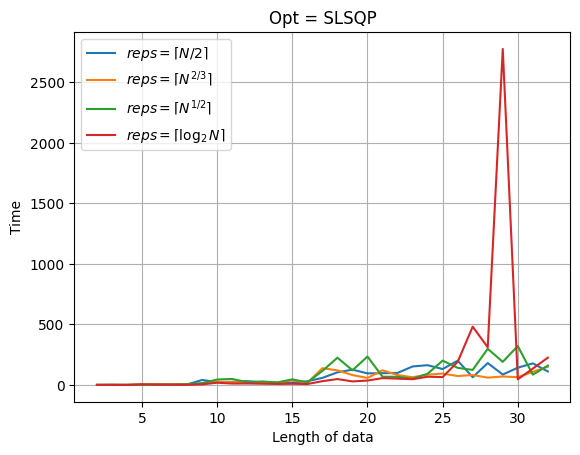

In [26]:
plt.plot(range(2, 33), time4, label=rep_comp['N'][1])
plt.plot(range(2, 33), time8, label=rep_comp['N23'][1])
plt.plot(range(2, 33), time5, label=rep_comp['N12'][1])
plt.plot(range(2, 33), time6, label=rep_comp['LogN'][1])

plt.grid(True)

plt.xlabel('Length of data')
plt.ylabel('Time')
plt.title('Opt = SLSQP')

plt.legend()
plt.savefig('time_SLSQP.png')

## Real Array

In [13]:
cst1 = open('expt1_real/cost.txt', 'r')
cst2 = open('expt2_real/cost.txt', 'r')
cst3 = open('expt3_real/cost.txt', 'r')
cst4 = open('expt4_real/cost.txt', 'r')
cst5 = open('expt5_real/cost.txt', 'r')
cst6 = open('expt6_real/cost.txt', 'r')
cst7 = open('expt7_real/cost.txt', 'r')
cst8 = open('expt8_real/cost.txt', 'r')

cost1 = list(map(float, cst1.read()[1:-1].split(', ')))
cost2 = list(map(float, cst2.read()[1:-1].split(', ')))
cost3 = list(map(float, cst3.read()[1:-1].split(', ')))
cost4 = list(map(float, cst4.read()[1:-1].split(', ')))
cost5 = list(map(float, cst5.read()[1:-1].split(', ')))
cost6 = list(map(float, cst6.read()[1:-1].split(', ')))
cost7 = list(map(float, cst7.read()[1:-1].split(', ')))
cost8 = list(map(float, cst8.read()[1:-1].split(', ')))

cst1.close()
cst2.close()
cst3.close()
cst4.close()
cst5.close()
cst6.close()
cst7.close()
cst8.close()

In [14]:
tme1 = open('expt1_real/time.txt', 'r')
tme2 = open('expt2_real/time.txt', 'r')
tme3 = open('expt3_real/time.txt', 'r')
tme4 = open('expt4_real/time.txt', 'r')
tme5 = open('expt5_real/time.txt', 'r')
tme6 = open('expt6_real/time.txt', 'r')
tme7 = open('expt7_real/time.txt', 'r')
tme8 = open('expt8_real/time.txt', 'r')

time1 = list(map(float, tme1.read()[1:-1].split(', ')))
time2 = list(map(float, tme2.read()[1:-1].split(', ')))
time3 = list(map(float, tme3.read()[1:-1].split(', ')))
time4 = list(map(float, tme4.read()[1:-1].split(', ')))
time5 = list(map(float, tme5.read()[1:-1].split(', ')))
time6 = list(map(float, tme6.read()[1:-1].split(', ')))
time7 = list(map(float, tme7.read()[1:-1].split(', ')))
time8 = list(map(float, tme8.read()[1:-1].split(', ')))

tme1.close()
tme2.close()
tme3.close()
tme4.close()
tme5.close()
tme6.close()
tme7.close()
tme8.close()

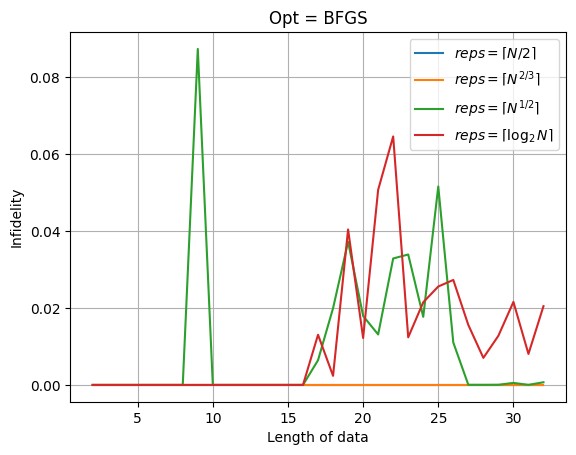

In [28]:
plt.plot(range(2, 33), cost1, label=rep_comp['N'][1])
plt.plot(range(2, 33), cost7, label=rep_comp['N23'][1])
plt.plot(range(2, 33), cost5, label=rep_comp['N12'][1])
plt.plot(range(2, 33), cost2, label=rep_comp['LogN'][1])

plt.grid(True)

plt.xlabel('Length of data')
plt.ylabel('Infidelity')
plt.title('Opt = BFGS')

plt.legend()
plt.savefig('real_infidelity_BFGS.png')

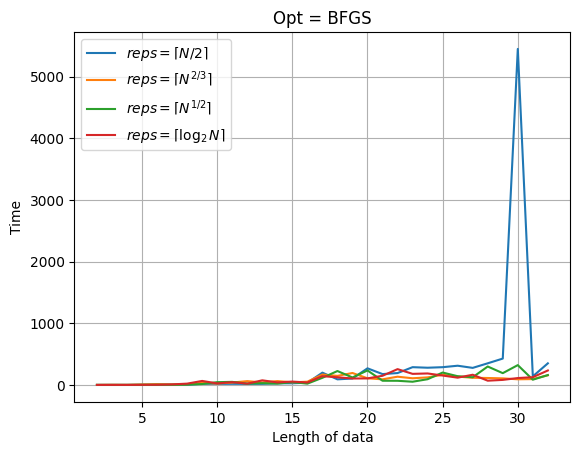

In [29]:
plt.plot(range(2, 33), time1, label=rep_comp['N'][1])
plt.plot(range(2, 33), time7, label=rep_comp['N23'][1])
plt.plot(range(2, 33), time5, label=rep_comp['N12'][1])
plt.plot(range(2, 33), time2, label=rep_comp['LogN'][1])

plt.grid(True)

plt.xlabel('Length of data')
plt.ylabel('Time')
plt.title('Opt = BFGS')

plt.legend()
plt.savefig('real_time_BFGS.png')

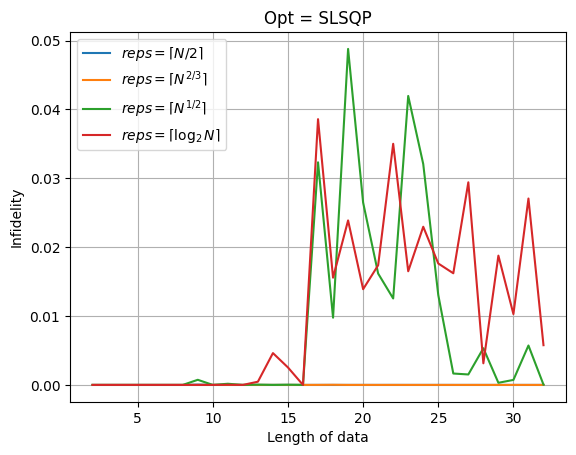

In [30]:
plt.plot(range(2, 33), cost3, label=rep_comp['N'][1])
plt.plot(range(2, 33), cost8, label=rep_comp['N23'][1])
plt.plot(range(2, 33), cost6, label=rep_comp['N12'][1])
plt.plot(range(2, 33), cost4, label=rep_comp['LogN'][1])

plt.grid(True)

plt.xlabel('Length of data')
plt.ylabel('Infidelity')
plt.title('Opt = SLSQP')

plt.legend()
plt.savefig('real_infidelity_SLSQP.png')

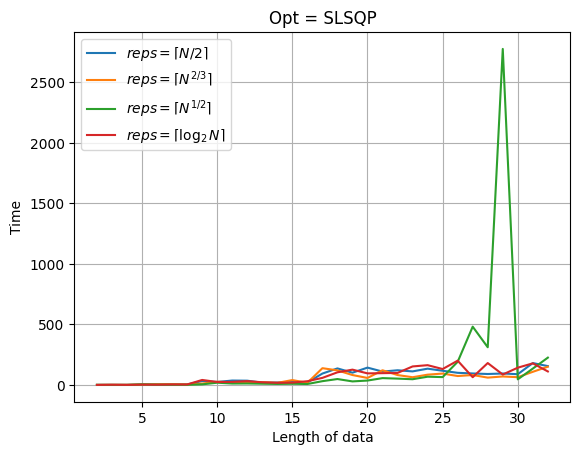

In [31]:
plt.plot(range(2, 33), time3, label=rep_comp['N'][1])
plt.plot(range(2, 33), time8, label=rep_comp['N23'][1])
plt.plot(range(2, 33), time6, label=rep_comp['N12'][1])
plt.plot(range(2, 33), time4, label=rep_comp['LogN'][1])

plt.grid(True)

plt.xlabel('Length of data')
plt.ylabel('Time')
plt.title('Opt = SLSQP')

plt.legend()
plt.savefig('real_time_SLSQP.png')